In [1]:
# Import modules and set options
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
# import pandas_profiling

sns.set(context='notebook', style='ticks')

In [2]:
lsl_dr = (pd.read_csv('../data/clean/lsl_dr_frozen_09272019.csv', index_col=0, low_memory=False)
                  .rename({'onset_1':'identify_mo'}, axis=1))

In [3]:
lsl_dr.shape

(65064, 246)

Exclusions

In [4]:
other_etiology = (lsl_dr[['etiology_3___2', 'etiology_3___4', 'etiology_3___5', 'etiology_3___6', 'etiology_3___9',
       'etiology_oth___1', 'etiology_oth___3', 'etiology_oth___4', 'etiology_oth___8', 'etiology_oth___9']]
                      .sum(1).astype(bool))

In [5]:
inclusion_mask = (~lsl_dr.non_english.astype(bool) 
                  & ((lsl_dr.autism==1)))

In [6]:
autism_subset = lsl_dr[inclusion_mask]
autism_subset.drop_duplicates(subset='study_id').shape

(67, 246)

## Demographics

In [7]:
autism_subset.male.replace({1: 'Male', 0: 'Female', np.nan: 'Missing'}).value_counts()

Male      228
Female     72
Name: male, dtype: int64

In [8]:
autism_subset.race.replace({0:'White', 1:'Black', 2:'Hispanic', 3:'Asian', 4:'Other', np.nan:'Missing'}).value_counts()

White       202
Other        38
Black        37
Hispanic      9
Asian         8
Missing       6
Name: race, dtype: int64

In [9]:
(autism_subset.premature_age.replace({9:None})==8).replace({True: '>=36 weeks', False: '<36 weeks', 
                                                            np.nan: 'Unknown'}).value_counts()

>=36 weeks    236
<36 weeks      64
Name: premature_age, dtype: int64

In [10]:
autism_subset.sib.replace({0:'1', 1:'2', 2:'3', 3:'4+', np.nan:'Missing'}).value_counts().sort_index()

1           88
2          117
3           55
4+          13
Missing     27
Name: sib, dtype: int64

In [11]:
ed_lookup = {0:"8th grade or less",
1:"Some high school",
2:"High school diploma/GED",
3:"Some college",
4:"Bachelor's degree",
5:"Post graduate degree",
6:"Unknown",
np.nan:"Unknown"}

autism_subset.mother_ed.replace(ed_lookup).value_counts()

High school diploma/GED    139
Unknown                     62
Some college                54
Some high school            45
Name: mother_ed, dtype: int64

In [12]:
autism_subset.father_ed.replace(ed_lookup).value_counts()

Bachelor's degree          86
Unknown                    74
Post graduate degree       67
Some college               45
High school diploma/GED    28
Name: father_ed, dtype: int64

In [13]:
family_lookup = {0:"Ideal Participation",
1:"Good Participation",
2:"Average Participation",
3:"Below Average",
4:"Limited Participation",
np.nan:"Missing"}

autism_subset.family_inv.replace(family_lookup).value_counts()

Ideal Participation      123
Average Participation     83
Missing                   49
Good Participation        37
Below Average              8
Name: family_inv, dtype: int64

In [14]:
autism_subset[["age_diag", "age_amp", "age_int", "age"]].describe()

,age_diag,age_amp,age_int,age
count,146.000000,142.000000,191.000000,297.000000
mean,15.767123,20.204225,24.989529,46.993266
std,18.262092,18.261512,19.596989,26.528668
min,0.000000,1.000000,1.000000,1.000000
25%,1.000000,3.250000,10.000000,30.000000
50%,10.000000,19.000000,23.000000,44.000000
75%,21.000000,27.000000,36.000000,65.000000
max,83.000000,83.000000,83.000000,141.000000


In [15]:
autism_subset.otherserv.replace({0: "OPTION + outside", 1: "OPTION only", 2: "Missing"}).value_counts()

OPTION + outside    121
OPTION only          80
Missing               8
Name: otherserv, dtype: int64

## Hearing loss

In [16]:
autism_subset.degree_hl_ad.isnull().sum()

90

In [17]:
autism_subset.degree_hl_as.isnull().sum()

90

In [18]:
autism_subset.degree_hl_ad.value_counts()

6.0    84
0.0    64
3.0    23
4.0    13
5.0    13
1.0     8
2.0     5
Name: degree_hl_ad, dtype: int64

In [19]:
autism_subset.degree_hl_as.value_counts()

0.0    73
6.0    72
3.0    22
5.0    18
2.0    16
4.0     7
1.0     2
Name: degree_hl_as, dtype: int64

In [20]:
hl_data = autism_subset.set_index('study_id')[['bilateral_snhl',
                     'bilateral_ansd',
                     'bilateral_mixed',
                     'bilateral_cond',
                     'bilateral_normal',
                     'bilateral_unk',
                     'unilateral_snhl',
                     'unilateral_ansd',
                     'unilateral_mixed',
                     'unilateral_cond',
                     'unilateral_unk',
                     'assymetrical']]

One or both parents with hearing loss

In [21]:
autism_subset.one_or_both_parent_hl.value_counts()

0.0    251
1.0     12
Name: one_or_both_parent_hl, dtype: int64

In [22]:
autism_subset.one_or_both_parent_hl.isnull().sum()

37

Individuals with no hearing loss type

In [23]:
hl_data[hl_data.sum(1)==0].index.values

array(['0416-2012-8486', '0416-2012-8486', '0416-2012-8486',
       '0416-2012-8486', '0416-2012-8486', '0416-2012-8486',
       '0735-2011-0006', '0735-2011-0006', '0735-2011-0006',
       '0735-2011-0006', '0735-2011-0006', '0411-2012-0006',
       '0411-2012-0006', '0411-2012-0006', '0411-2012-0017',
       '0411-2012-0017', '0411-2011-0035', '0411-2011-0035',
       '0411-2011-0035', '0414-2015-0024', '0414-2015-0024',
       '0414-2015-0024', '0414-2015-0024', '0414-2015-0024',
       '0411-2012-0035', '0411-2012-0035', '0411-2012-0035',
       '0411-2013-0006', '0411-2013-0006', '0411-2013-0006',
       '0411-2013-0004', '0411-2013-0004', '0411-2013-0004',
       '0414-2017-0020', '0414-2017-0020', '0414-2017-0020',
       '0414-2017-0020', '0414-2017-0020', '0414-2017-0023',
       '0414-2017-0023', '0414-2017-0023', '0414-2017-0023',
       '0414-2017-0023', '0414-2014-0267', '0414-2014-0267',
       '0414-2014-0267', '0414-2014-0267', '0414-2014-0267',
       '0414-2014-0267',

In [24]:
hl_data.sum().astype(int).sort_values(ascending=False)

bilateral_snhl      133
bilateral_normal     64
unilateral_snhl       6
unilateral_mixed      3
assymetrical          2
bilateral_mixed       2
unilateral_unk        0
unilateral_cond       0
unilateral_ansd       0
bilateral_unk         0
bilateral_cond        0
bilateral_ansd        0
dtype: int64

In [25]:
hl_data.mean().round(2).sort_values(ascending=False)

bilateral_snhl      0.44
bilateral_normal    0.21
unilateral_snhl     0.02
assymetrical        0.01
unilateral_mixed    0.01
bilateral_mixed     0.01
unilateral_unk      0.00
unilateral_cond     0.00
unilateral_ansd     0.00
bilateral_unk       0.00
bilateral_cond      0.00
bilateral_ansd      0.00
dtype: float64

In [26]:
tech_data = autism_subset.set_index('study_id')[['bilateral_ha',
                     'bilateral_ci',
                     'bimodal',
                     'bilateral_other',
                     'unilateral_ha',
                     'unilateral_ci',
                     'unilateral_other']]

In [27]:
tech_data.sum().astype(int).sort_values(ascending=False)

bilateral_ci        190
bilateral_ha         20
unilateral_ci        14
bimodal              10
unilateral_other      0
unilateral_ha         0
bilateral_other       0
dtype: int64

In [28]:
tech_data.mean().round(2).sort_values(ascending=False)

bilateral_ci        0.63
bilateral_ha        0.07
unilateral_ci       0.05
bimodal             0.03
unilateral_other    0.00
unilateral_ha       0.00
bilateral_other     0.00
dtype: float64

Individuals with no technology type

In [29]:
tech_data[tech_data.sum(1)==0].index.values

array(['0735-2019-0020', '0735-2019-0020', '0414-2011-0180',
       '0414-2011-0180', '0414-2011-0180', '0414-2011-0180',
       '0414-2009-0079', '0414-2009-0079', '0414-2009-0079',
       '0414-2009-0079', '0414-2009-0079', '0414-2009-0079',
       '0414-2009-0041', '0414-2009-0041', '0414-2009-0041',
       '0414-2009-0041', '0414-2009-0041', '0414-2009-0041',
       '0414-2009-0056', '0414-2009-0056', '0414-2009-0056',
       '0414-2009-0056', '0414-2009-0056', '0414-2009-0056',
       '0414-2012-0228', '0414-2012-0228', '0414-2012-0228',
       '0414-2012-0228', '0414-2012-0228', '0414-2012-0228',
       '0414-2012-0229', '0414-2012-0229', '0414-2012-0229',
       '0414-2012-0229', '0414-2012-0229', '0414-2012-0229',
       '0414-2011-0153', '0414-2011-0153', '0414-2011-0153',
       '0414-2011-0153', '0414-2011-0153', '0414-2011-0153',
       '0414-2011-0155', '0414-2011-0155', '0414-2011-0155',
       '0414-2011-0155', '0414-2011-0155', '0414-2011-0155',
       '0414-2011-0154',

## Hearing Loss

In [30]:
autism_subset.columns[autism_subset.columns.str.contains('_hl_')]

Index(['degree_hl_ad', 'type_hl_ad', 'degree_hl_as', 'type_hl_as',
       'bilateral_hl_normal', 'bilateral_hl_slight', 'bilateral_hl_mild',
       'bilateral_hl_moderate', 'bilateral_hl_modsev', 'bilateral_hl_severe',
       'bilateral_hl_profound', 'unilateral_hl_slight', 'unilateral_hl_mild',
       'unilateral_hl_moderate', 'unilateral_hl_modsev',
       'unilateral_hl_severe', 'unilateral_hl_profound'],
      dtype='object')

In [31]:
hl_data = autism_subset.set_index('study_id')[['bilateral_hl_normal', 'bilateral_hl_slight', 'bilateral_hl_mild',
       'bilateral_hl_moderate', 'bilateral_hl_modsev', 'bilateral_hl_severe',
       'bilateral_hl_profound', 'unilateral_hl_slight', 'unilateral_hl_mild',
       'unilateral_hl_moderate', 'unilateral_hl_modsev',
       'unilateral_hl_severe', 'unilateral_hl_profound']]

In [32]:
hl_data.sum().astype(int).sort_values(ascending=False)

bilateral_hl_profound     69
bilateral_hl_normal       64
bilateral_hl_moderate     14
bilateral_hl_severe       13
unilateral_hl_modsev       9
bilateral_hl_mild          3
bilateral_hl_slight        2
unilateral_hl_profound     0
unilateral_hl_severe       0
unilateral_hl_moderate     0
unilateral_hl_mild         0
unilateral_hl_slight       0
bilateral_hl_modsev        0
dtype: int64

In [33]:
hl_data.mean().round(2).sort_values(ascending=False)

bilateral_hl_profound     0.23
bilateral_hl_normal       0.21
bilateral_hl_moderate     0.05
bilateral_hl_severe       0.04
unilateral_hl_modsev      0.03
bilateral_hl_mild         0.01
bilateral_hl_slight       0.01
unilateral_hl_profound    0.00
unilateral_hl_severe      0.00
unilateral_hl_moderate    0.00
unilateral_hl_mild        0.00
unilateral_hl_slight      0.00
bilateral_hl_modsev       0.00
dtype: float64

Missing one or both hearing loss values (left/right)

In [34]:
(autism_subset[['degree_hl_ad', 'degree_hl_as']].isnull().sum(1) > 0).sum()

90

## Summary of scores by domain

In [35]:
test_scores = lsl_dr[inclusion_mask].copy()

In [36]:
test_scores.loc[(test_scores.domain=='Language') & (test_scores.test_type=='receptive'), 
           'domain'] = 'Receptive Language'
test_scores.loc[(test_scores.domain=='Language') & (test_scores.test_type=='expressive'), 
           'domain'] = 'Expressive Language'

In [37]:
test_scores.groupby('domain').score_adj.describe().round(1)

,count,mean,std,min,25%,50%,75%,max
domain,,,,,,,,
Articulation,33.0,75.2,20.2,33.6,56.8,78.5,91.0,103.8
Expressive Language,54.0,69.4,18.7,42.0,56.2,64.0,80.8,115.0
Expressive Vocabulary,52.0,81.6,20.1,20.0,70.8,79.5,98.0,125.0
Language,53.0,67.8,20.1,42.0,53.0,61.0,79.0,129.0
Receptive Language,53.0,70.2,20.2,45.8,54.0,65.0,79.0,140.0
Receptive Vocabulary,55.0,80.6,20.5,34.0,69.0,79.0,93.0,141.0


In [38]:
test_scores.domain.unique()

array(['Expressive Vocabulary', 'Receptive Vocabulary',
       'Receptive Language', 'Expressive Language', 'Language',
       'Articulation'], dtype=object)

In [39]:
test_scores['domain_labels'] = test_scores.domain.replace({'Expressive Vocabulary': 'Expressive\nVocabulary', 
                                                           'Receptive Vocabulary': 'Receptive\nVocabulary',
                                                           'Receptive Language': 'Receptive\nLanguage', 
                                                           'Expressive Language': 'Expressive\nLanguage', 
                                                           'Language': 'Total\nLanguage'})

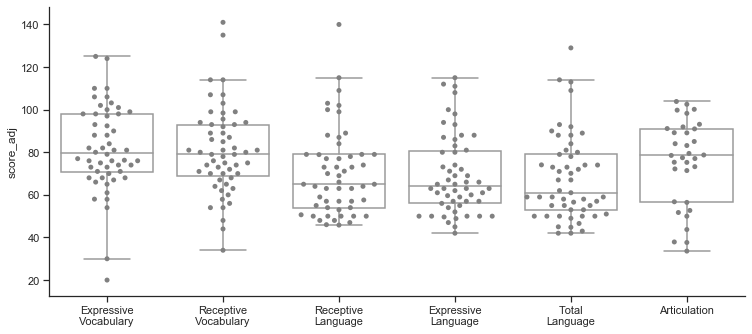

In [40]:
sns.catplot("domain_labels", y="score_adj", data=test_scores, kind="box", color='white', fliersize=0)
sns.swarmplot("domain_labels", y="score_adj", data=test_scores, color='grey')
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

## Domain-specific summaries

Age of amplification greater than 6mo.

In [41]:
(test_scores.assign(age_amp_greater_6=test_scores.age_amp>6)
         .groupby(['domain', 'age_amp_greater_6'])
         .score_adj.describe())

count       mean        std  \
domain                age_amp_greater_6                                
Articulation          False               27.0  74.371700  21.521592   
                      True                 6.0  78.886760  13.412183   
Expressive Language   False               34.0  71.750321  19.300736   
                      True                20.0  65.343310  17.376545   
Expressive Vocabulary False               37.0  83.985289  18.648488   
                      True                15.0  75.691109  23.064933   
Language              False               34.0  70.480697  21.294935   
                      True                19.0  63.094254  17.335585   
Receptive Language    False               34.0  73.508241  22.480496   
                      True                19.0  64.200509  13.723710   
Receptive Vocabulary  False               39.0  83.142590  20.695783   
                      True                16.0  74.395828  19.382111   

                                               min        25%        50%  \
domain                age_amp_greater_6                                    
Articulation          False              33.609025  54.721065  77.051675   
                      True               56.462598  77.714229  78.986999   
Expressive Language   False              42.000000  59.158835  66.500000   
                      True               48.866200  51.500000  62.000000   
Expressive Vocabulary False              30.000000  74.000000  81.000000   
                      True               20.000000  64.500000  73.000000   
Language              False              42.000000  55.000000  71.054888   
                      True               44.790831  50.500000  58.000000   
Receptive Language    False              47.000000  55.500000  70.564310   
                      True               45.809673  53.500000  64.000000   
Receptive Vocabulary  False              44.000000  71.500000  80.000000   
                      True               34.000000  63.229390  72.500000   

                                               75%         max  
domain                age_amp_greater_6                         
Articulation          False              91.049921  103.834610  
                      True               82.239163   98.270773  
Expressive Language   False              82.500000  115.000000  
                      True               69.000000  112.000000  
Expressive Vocabulary False              98.000000  125.000000  
                      True               92.701415  110.000000  
Language              False              83.000000  129.000000  
                      True               69.000000  113.000000  
Receptive Language    False              86.250000  140.000000  
                      True               73.000000  100.000000  
Receptive Vocabulary  False              93.500000  141.000000  
                      True               85.229645  107.000000

Age of enrollment greater than 6mo.

In [42]:
(test_scores.assign(age_enroll_greater_6=test_scores.age_int>6)
         .groupby(['domain', 'age_enroll_greater_6'])
         .score_adj.describe())

count       mean        std  \
domain                age_enroll_greater_6                                
Articulation          False                  18.0  71.607199  19.347872   
                      True                   15.0  79.495125  20.992024   
Expressive Language   False                  24.0  69.849820  20.630313   
                      True                   30.0  68.999381  17.368526   
Expressive Vocabulary False                  30.0  81.739365  20.682822   
                      True                   22.0  81.392790  19.874097   
Language              False                  24.0  68.635991  23.418879   
                      True                   29.0  67.167957  17.316955   
Receptive Language    False                  24.0  70.265702  23.332007   
                      True                   29.0  70.093553  17.527721   
Receptive Vocabulary  False                  31.0  81.018097  22.583189   
                      True                   24.0  80.055552  18.017416   

                                                  min        25%        50%  \
domain                age_enroll_greater_6                                    
Articulation          False                 33.609025  60.422410  75.283775   
                      True                  37.645436  66.954815  84.032951   
Expressive Language   False                 42.000000  56.500000  63.000000   
                      True                  47.000000  56.250000  65.000000   
Expressive Vocabulary False                 30.000000  68.750000  76.500000   
                      True                  20.000000  71.500000  82.000000   
Language              False                 42.000000  52.500000  59.000000   
                      True                  42.000000  53.000000  67.000000   
Receptive Language    False                 48.000000  52.412641  65.000000   
                      True                  45.809673  57.000000  65.000000   
Receptive Vocabulary  False                 44.000000  69.000000  75.000000   
                      True                  34.000000  69.250000  81.500000   

                                                  75%         max  
domain                age_enroll_greater_6                         
Articulation          False                 86.515156  100.168326  
                      True                  95.091085  103.834610  
Expressive Language   False                 80.250000  115.000000  
                      True                  82.250000  112.000000  
Expressive Vocabulary False                 98.500000  125.000000  
                      True                  96.750000  110.000000  
Language              False                 78.250000  129.000000  
                      True                  80.000000  113.000000  
Receptive Language    False                 75.000000  140.000000  
                      True                  79.000000  115.000000  
Receptive Vocabulary  False                 93.500000  141.000000  
                      True                  92.250000  114.000000

(Non-)Profound hearing loss

In [43]:
(test_scores.assign(profound_hl=test_scores.degree_hl==6)
         .groupby(['domain', 'profound_hl'])
         .score_adj.describe())

count       mean        std        min  \
domain                profound_hl                                           
Articulation          False         30.0  75.567017  20.682573  33.609025   
                      True           3.0  71.448655  17.184409  51.721630   
Expressive Language   False         35.0  68.610923  16.602147  45.000000   
                      True          19.0  70.789201  22.505650  42.000000   
Expressive Vocabulary False         39.0  83.215457  18.172856  30.000000   
                      True          13.0  76.724576  25.398996  20.000000   
Language              False         34.0  67.271586  17.093674  42.000000   
                      True          19.0  68.836874  25.129454  42.000000   
Receptive Language    False         34.0  70.680929  17.200884  47.000000   
                      True          19.0  69.259910  25.094310  45.809673   
Receptive Vocabulary  False         41.0  80.718118  17.226429  44.000000   
                      True          14.0  80.246530  28.965042  34.000000   

                                         25%        50%        75%         max  
domain                profound_hl                                               
Articulation          False        60.422410  77.981427  91.089386  103.834610  
                      True         65.589902  79.458174  81.312167   83.166159  
Expressive Language   False        56.500000  63.000000  80.500000  112.000000  
                      True         53.500000  65.000000  78.564310  115.000000  
Expressive Vocabulary False        73.000000  81.000000  98.000000  125.000000  
                      True         65.000000  76.274745  93.000000  124.000000  
Language              False        55.394703  61.500000  79.500000  113.000000  
                      True         51.500000  59.000000  76.000000  129.000000  
Receptive Language    False        57.000000  65.500000  78.975840  115.000000  
                      True         50.000000  63.000000  78.000000  140.000000  
Receptive Vocabulary  False        70.000000  79.000000  93.000000  114.000000  
                      True         65.500000  75.500000  85.743215  141.000000

Parent with(out) hearing loss

In [44]:
test_scores.loc[test_scores.parent_hearing_loss=='Unknown', 'parent_hearing_loss'] = np.nan
(test_scores.assign(parent_with_hl=test_scores.parent_hearing_loss.isin(['Both parents have hearing loss',
                                                                       'Father has hearing loss',
                                                                       'Mother has hearing loss']))
         .groupby(['domain', 'parent_with_hl'])
         .score_adj.describe())

count       mean        std        min  \
domain                parent_with_hl                                           
Articulation          False            31.0  74.546042  20.625267  33.609025   
                      True              2.0  85.214582   8.140790  79.458174   
Expressive Language   False            52.0  69.913671  18.816390  42.000000   
                      True              2.0  55.433100   9.286999  48.866200   
Expressive Vocabulary False            50.0  82.016446  20.338114  20.000000   
                      True              2.0  71.000000  14.142136  61.000000   
Language              False            51.0  68.536151  20.158483  42.000000   
                      True              2.0  49.895415   7.218973  44.790831   
Receptive Language    False            51.0  70.730984  20.246734  46.000000   
                      True              2.0  55.904837  14.276717  45.809673   
Receptive Vocabulary  False            53.0  81.148948  20.591579  34.000000   
                      True              2.0  66.000000  16.970563  54.000000   

                                            25%        50%        75%  \
domain                parent_with_hl                                    
Articulation          False           56.610061  77.447031  90.156904   
                      True            82.336378  85.214582  88.092786   
Expressive Language   False           56.750000  65.000000  81.500000   
                      True            52.149650  55.433100  58.716550   
Expressive Vocabulary False           71.000000  79.523123  98.000000   
                      True            66.000000  71.000000  76.000000   
Language              False           53.000000  62.000000  79.500000   
                      True            47.343123  49.895415  52.447708   
Receptive Language    False           54.500000  65.000000  79.000000   
                      True            50.857255  55.904837  60.952418   
Receptive Vocabulary  False           70.000000  80.000000  93.000000   
                      True            60.000000  66.000000  72.000000   

                                            max  
domain                parent_with_hl             
Articulation          False           103.83461  
                      True             90.97099  
Expressive Language   False           115.00000  
                      True             62.00000  
Expressive Vocabulary False           125.00000  
                      True             81.00000  
Language              False           129.00000  
                      True             55.00000  
Receptive Language    False           140.00000  
                      True             66.00000  
Receptive Vocabulary  False           141.00000  
                      True             78.00000

Mother with(out) college education

In [45]:
test_scores.groupby(['domain', 'mother_college']).score_adj.describe()

count       mean        std        min  \
domain                mother_college                                           
Articulation          0.0              19.0  71.758393  21.703495  33.609025   
                      1.0               7.0  90.697977  11.875320  77.447031   
Expressive Language   0.0              34.0  66.654231  15.630561  42.000000   
                      1.0              10.0  81.850154  20.757334  48.866200   
Expressive Vocabulary 0.0              31.0  80.294992  18.491622  20.000000   
                      1.0               8.0  91.800354  16.706899  61.000000   
Language              0.0              33.0  65.733021  16.241174  42.000000   
                      1.0              10.0  79.236964  23.145471  44.790831   
Receptive Language    0.0              33.0  68.970666  16.903753  46.000000   
                      1.0              10.0  78.340733  21.662338  45.809673   
Receptive Vocabulary  0.0              34.0  79.601512  15.030383  34.000000   
                      1.0               9.0  93.271425  25.079776  54.000000   

                                            25%        50%         75%  \
domain                mother_college                                     
Articulation          0.0             53.223940  77.051675   88.018637   
                      1.0             79.087935  93.132632  101.147848   
Expressive Language   0.0             57.000000  63.000000   73.778809   
                      1.0             67.500000  84.000000   91.750000   
Expressive Vocabulary 0.0             73.000000  79.046246   90.500000   
                      1.0             86.000000  96.201415  102.250000   
Language              0.0             55.000000  62.000000   74.000000   
                      1.0             60.934110  79.500000   88.000000   
Receptive Language    0.0             57.000000  66.000000   77.000000   
                      1.0             62.448241  78.500000   96.250000   
Receptive Vocabulary  0.0             71.250000  78.500000   88.250000   
                      1.0             87.000000  98.442827  103.000000   

                                             max  
domain                mother_college              
Articulation          0.0             100.168326  
                      1.0             103.834610  
Expressive Language   0.0             108.000000  
                      1.0             112.000000  
Expressive Vocabulary 0.0             125.000000  
                      1.0             110.000000  
Language              0.0             109.000000  
                      1.0             114.000000  
Receptive Language    0.0             115.000000  
                      1.0             109.000000  
Receptive Vocabulary  0.0             114.000000  
                      1.0             135.000000